In [1]:
# converting survey answer to Likert scale values
def coding(answer):
    if answer.lower() == "strongly disagree" or answer.lower() == "very dissatisfied":
        return 1
    if answer.lower() == "disagree" or answer.lower() == "dissatisfied":
        return 2
    if answer.lower() == "somewhat disagree" or answer.lower() == "somewhat dissatisfied":
        return 3
    if answer.lower() == "neutral":
        return 4
    if answer.lower() == "somewhat agree" or answer.lower() == "somewhat satisfied":
        return 5
    if answer.lower() == "agree" or answer.lower() == "satisfied":
        return 6
    if answer.lower() == "strongly agree" or answer.lower() == "very satisfied":
        return 7

# converting survey answer to Likert scale values.
# Reverse coding for quesions with negative connotation 
# Questions 5, 6 and 7 (counting from 0)
def reverse_coding(answer):
    if answer.lower() == "strongly disagree":
        return 7
    if answer.lower() == "disagree":
        return 6
    if answer.lower() == "somewhat disagree":
        return 5
    if answer.lower() == "neutral":
        return 4
    if answer.lower() == "somewhat agree":
        return 3
    if answer.lower() == "agree":
        return 2
    if answer.lower() == "strongly agree":
        return 1
    
    

In [2]:
import csv

def create_participant(data):
    participant = {}
    participant['Time_stamp'] = data[0] #timestamp
    participant ['ID'] = data[2] #ID
    
    answers = data[3:]
    satisfaction_answers = []
    trust_answers = []
    
    for i, a in enumerate(answers):
        if i in [5, 6, 7]:
            value = reverse_coding(a)
        else:
            value = coding(a)
            
        # Questions about Satifaction are from 0th to 4th
        # Questions abour Trust are from 5th to 12th
        if i in [0, 1, 2, 3, 4]:
            satisfaction_answers.append(value)
        else:
            trust_answers.append(value)
        
        
    participant ['Satisfaction_values'] = satisfaction_answers
    participant ['Trust_values'] = trust_answers
    return participant

def read_file(name):
    
    participants = []
    with open(name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        line_count = 0
        for row in csv_reader:
            if line_count != 0:
                participants.append(create_participant(row))
            line_count += 1
            
        print(f'Processed {line_count} lines.')
    
    return participants
    


In [3]:
# Reading data

data_file = 'Post_experiment_survey_(Responses).csv'

participant_data = read_file(data_file)

print(participant_data)


Processed 121 lines.
[{'Time_stamp': '6-9-2021 16:15:59', 'ID': '5ee0f10ab1d069473c3e7f21', 'Satisfaction_values': [5, 4, 5, 4, 5], 'Trust_values': [6, 5, 4, 4, 4, 2, 3, 3]}, {'Time_stamp': '6-9-2021 16:43:01', 'ID': '60c044f3f24cf2c07b004bf4', 'Satisfaction_values': [7, 7, 7, 7, 7], 'Trust_values': [7, 7, 7, 4, 7, 7, 7, 7]}, {'Time_stamp': '6-9-2021 16:50:26', 'ID': '60182a8fa71d8301ef65f009', 'Satisfaction_values': [7, 7, 7, 7, 7], 'Trust_values': [7, 7, 7, 1, 1, 1, 7, 7]}, {'Time_stamp': '6-9-2021 16:54:43', 'ID': '606afb3aa8b47e30a699e5d7', 'Satisfaction_values': [7, 7, 7, 6, 7], 'Trust_values': [7, 6, 7, 6, 6, 6, 6, 6]}, {'Time_stamp': '6-9-2021 17:39:19', 'ID': '60c0bf1d97a6cbdaf7c1bb18', 'Satisfaction_values': [5, 6, 7, 6, 6], 'Trust_values': [6, 6, 5, 5, 5, 6, 6, 6]}, {'Time_stamp': '6-9-2021 17:41:07', 'ID': '5f775a59786a4c265a7e2276', 'Satisfaction_values': [2, 4, 3, 4, 3], 'Trust_values': [5, 5, 4, 3, 4, 4, 4, 4]}, {'Time_stamp': '6-9-2021 17:55:08', 'ID': '60c08c3488766a5a1

In [4]:
# Plain and none 6-9-2021 16:11; 6-10-2021 14:45
# Plain and low 6-9-2021 17:18;  6-10-2021 16:52
# Plain and medium 6-9-2021 18:17;  6-10-2021 19:21
# Plain and high 6-9-2021 19:47;  6-10-2021 21:42
# Emoji and none 6-9-2021 23:52;   6-11-2021 00:15
# Emoji and low 6-10-2021 08:41;  6-11-2021 09:52
# Emoji and medium 6-10-2021 10:05;  6-11-2021 11:44 
# Emoji and high 6-10-2021 11:24

import statistics as stat

plain_none_sat = []
plain_none_trust = []

plain_low_sat = []
plain_low_trust = []

plain_medium_sat = []
plain_medium_trust = []

plain_high_sat = []
plain_high_trust = []

emoji_none_sat = []
emoji_none_trust = []

emoji_low_sat = []
emoji_low_trust = []

emoji_medium_sat = []
emoji_medium_trust = []

emoji_high_sat = []
emoji_high_trust = []

#splitting the participants according to their group
for i, p in enumerate (participant_data):
    if i < 4 or (i > 42 and i < 54):
        satisfaction_score = stat.mean(p["Satisfaction_values"])
        trust_score = stat.mean(p["Trust_values"])
        
        plain_none_sat.append(satisfaction_score)
        plain_none_trust.append(trust_score)
    elif i < 8 or (i > 53 and i < 65):
        satisfaction_score =stat.mean(p["Satisfaction_values"])
        trust_score = stat.mean(p["Trust_values"])
        
        plain_low_sat.append(satisfaction_score)
        plain_low_trust.append(trust_score)
    elif i < 12 or (i > 64 and i < 76):
        satisfaction_score = stat.mean(p["Satisfaction_values"])
        trust_score = stat.mean(p["Trust_values"])
        
        plain_medium_sat.append(satisfaction_score)
        plain_medium_trust.append(trust_score)
    elif i < 16 or (i > 75 and i < 87):
        satisfaction_score = stat.mean(p["Satisfaction_values"])
        trust_score = stat.mean(p["Trust_values"])
        
        plain_high_sat.append(satisfaction_score)
        plain_high_trust.append(trust_score)
    elif i < 20 or (i > 86 and i < 98):
        satisfaction_score = stat.mean(p["Satisfaction_values"])
        trust_score = stat.mean(p["Trust_values"])
        
        emoji_none_sat.append(satisfaction_score)
        emoji_none_trust.append(trust_score)
    elif i < 24 or (i > 97 and i < 109):
        satisfaction_score = stat.mean(p["Satisfaction_values"])
        trust_score = stat.mean(p["Trust_values"])
        
        emoji_low_sat.append(satisfaction_score)
        emoji_low_trust.append(trust_score)
    elif i < 28 or (i > 108 and i < 120):
        satisfaction_score = stat.mean(p["Satisfaction_values"])
        trust_score =stat.mean(p["Trust_values"])
        
        emoji_medium_sat.append(satisfaction_score)
        emoji_medium_trust.append(trust_score)
    elif i < 43:
        satisfaction_score = stat.mean(p["Satisfaction_values"])
        trust_score = stat.mean(p["Trust_values"])
        
        emoji_high_sat.append(satisfaction_score)
        emoji_high_trust.append(trust_score)
        
# print(len(plain_none))
# print(len(plain_low))
# print(len(plain_medium))
# print(len(plain_high))

# print(len(emoji_none))
# print(len(emoji_low))
# print(len(emoji_medium))
# print(len(emoji_high))

print(plain_none_sat)
print(plain_none_trust)

print(plain_low_sat)
print(plain_low_trust)

print(plain_medium_sat)
print(plain_medium_trust)

print(plain_high_sat)
print(plain_high_trust)

print(emoji_none_sat)
print(emoji_none_trust)

print(emoji_low_sat)
print(emoji_low_trust)

print(emoji_medium_sat)
print(emoji_medium_trust)

print(emoji_high_sat)
print(emoji_high_trust)


[4.6, 7, 7, 6.8, 6, 7, 6, 5.4, 6, 5.6, 7, 5.2, 6, 6.2, 6]
[3.875, 6.625, 4.75, 6.25, 4.75, 5.375, 6, 4.125, 6, 5.625, 6.25, 4.625, 5.25, 5.5, 4.5]
[6, 3.2, 5.4, 5.8, 6, 5, 6, 5.4, 6.2, 6.4, 4.4, 6.2, 6, 5.8, 6.6]
[5.625, 4.125, 5, 5.875, 5.75, 4.375, 5.75, 5.875, 5.5, 4.75, 4.625, 5, 5.25, 4.875, 6.25]
[6.4, 4.4, 5.8, 6.8, 5.2, 4.6, 6, 6, 5, 5.2, 6.2, 6, 6.2, 4.6, 6.2]
[5.625, 5.25, 5.375, 5.875, 5, 4.25, 4.625, 3.25, 5.625, 4.375, 6, 5.5, 5.125, 4.75, 5.125]
[7, 5.6, 6.2, 6.2, 7, 5.2, 5, 4.6, 6, 7, 4, 5.4, 5.8, 7, 6]
[5.875, 5.75, 5.5, 4.625, 5.5, 5.25, 5, 4.125, 5, 6.125, 3.625, 6.125, 6.625, 5.375, 4.875]
[7, 5.8, 6.6, 6, 6.4, 5.2, 5.8, 6.4, 5.4, 5.4, 5.4, 6.4, 6.2, 6.8, 4.8]
[6.375, 5, 4.75, 5.375, 4.375, 4.375, 5.5, 4.625, 5, 4.75, 4.625, 5.5, 4.875, 5, 5.5]
[5.2, 5.8, 7, 4.8, 4.4, 6.8, 5.6, 5.6, 5.4, 6, 5.8, 5.2, 6, 6.8, 5.8]
[4.25, 5.375, 5.5, 4.375, 3.125, 7, 5.625, 5.375, 5.375, 3.875, 6.25, 3.375, 6.375, 5.75, 4]
[7, 6, 6, 6.2, 6.4, 4.2, 6.6, 5.2, 6.2, 7, 6.4, 6, 6.4, 5.6, 7]

In [5]:
from tabulate import tabulate


conditions = ['PN', 'PL', 'PM', 'PH', 'EN', 'EL', 'EM', 'EH']

### SATISFACTION ####
sat_all = [plain_none_sat, plain_low_sat, plain_medium_sat, plain_high_sat, emoji_none_sat, emoji_low_sat, emoji_medium_sat, emoji_high_sat]
sat_means = []
sat_deviations = []

for s in sat_all:
    sat_means.append(stat.mean(s))
    sat_deviations.append(stat.stdev(s))
    
sat_info = {
    'Condition': conditions,
    'Mean': sat_means,
    'SD': sat_deviations
}


print(tabulate(sat_info, headers='keys'))


Condition       Mean        SD
-----------  -------  --------
PN           6.12     0.736012
PL           5.62667  0.874616
PM           5.64     0.745271
PH           5.86667  0.924791
EN           5.97333  0.640833
EL           5.74667  0.726898
EM           6.14667  0.738596
EH           5.6      0.831522


In [6]:
import matplotlib.pyplot as plt

# #SATISFACTION
# sat_all_flat = [y for x in sat_all for y in x]

# plt.hist(sat_all_flat, 100)
# plt.show()

# #TRUST
# trust_all_flat = [y for x in trust_all for y in x]

# plt.hist(trust_all_flat, 100)
# plt.show()

   Anthropomorphism  No Emoji  Emoji
0              none       4.6    7.0
1              none       7.0    5.8
2              none       7.0    6.6
3              none       6.8    6.0
4              none       6.0    6.4
5              none       7.0    5.2
6              none       6.0    5.8
7              none       5.4    6.4
8              none       6.0    5.4
9              none       5.6    5.4
10             none       7.0    5.4
11             none       5.2    6.4
12             none       6.0    6.2
13             none       6.2    6.8
14             none       6.0    4.8
15              low       6.0    5.2
16              low       3.2    5.8
17              low       5.4    7.0
18              low       5.8    4.8
19              low       6.0    4.4
20              low       5.0    6.8
21              low       6.0    5.6
22              low       5.4    5.6
23              low       6.2    5.4
24              low       6.4    6.0
25              low       4.4    5.8
2

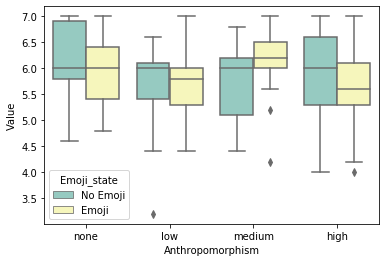

In [17]:
#ANOVA STUFF
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

#SATISFACTION
df = pd.DataFrame({'Anthropomorphism': np.repeat(['none', 'low', 'medium', 'high'], 15),
                   'No Emoji': plain_none_sat + plain_low_sat + plain_medium_sat + plain_high_sat,
                   'Emoji': emoji_none_sat + emoji_low_sat + emoji_medium_sat + emoji_high_sat })
print(df)

d_melt = pd.melt(df, id_vars=['Anthropomorphism'], value_vars=['No Emoji', 'Emoji'])

d_melt.columns = ['Anthropomorphism', 'Emoji_state', 'Value']
# d_melt

sns.boxplot(x="Anthropomorphism", y="Value", hue="Emoji_state", data=d_melt, palette="Set3") 





In [8]:
#p value (PR) must be less than 0.05 to be statistically significant 


#Satisfaction
model = ols('Value ~ C(Anthropomorphism) + C(Emoji_state) + C(Anthropomorphism):C(Emoji_state)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table



,sum_sq,df,F,PR(>F)
C(Anthropomorphism),2.413333,3.0,1.315168,0.273051
C(Emoji_state),0.085333,1.0,0.139510,0.709475
C(Anthropomorphism):C(Emoji_state),2.642667,3.0,1.440145,0.234920
Residual,68.506667,112.0,NaN,NaN


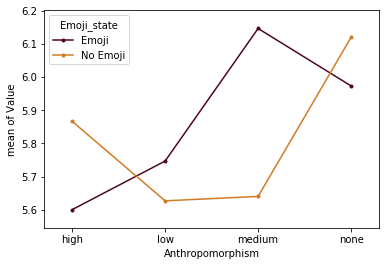

In [9]:
from statsmodels.graphics.factorplots import interaction_plot

#satisfaction
fig = interaction_plot(x=d_melt['Anthropomorphism'], trace=d_melt['Emoji_state'], response=d_melt['Value'], 
    colors=['#4c061d','#d17a22'])
plt.show()



In [10]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=d_melt, res_var='Value', xfac_var='Anthropomorphism', anova_model='Value~C(Anthropomorphism)+C(Emoji_state)+C(Anthropomorphism):C(Emoji_state)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,none,low,0.360000,-0.166685,0.886685,2.521191,0.287223
1,none,medium,0.153333,-0.373351,0.680018,1.073841,0.859174
2,none,high,0.313333,-0.213351,0.840018,2.194370,0.411834
3,low,medium,0.206667,-0.320018,0.733351,1.447350,0.711788
4,low,high,0.046667,-0.480018,0.573351,0.326821,0.900000
5,medium,high,0.160000,-0.366685,0.686685,1.120529,0.840752


In [11]:
res.tukey_hsd(df=d_melt, res_var='Value', xfac_var='Emoji_state', anova_model='Value~C(Anthropomorphism)+C(Emoji_state)+C(Anthropomorphism):C(Emoji_state)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,No Emoji,Emoji,0.053333,-0.229586,0.336253,0.528223,0.720197


In [16]:
res.tukey_hsd(df=d_melt, res_var='Value', xfac_var=['Anthropomorphism','Emoji_state'], anova_model='Value~C(Anthropomorphism)+C(Emoji_state)+C(Anthropomorphism):C(Emoji_state)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(none, No Emoji)","(none, Emoji)",0.146667,-0.735465,1.028799,0.726306,0.900000
1,"(none, No Emoji)","(low, No Emoji)",0.493333,-0.388799,1.375465,2.443029,0.647569
2,"(none, No Emoji)","(low, Emoji)",0.373333,-0.508799,1.255465,1.848779,0.894014
3,"(none, No Emoji)","(medium, No Emoji)",0.480000,-0.402132,1.362132,2.377002,0.674953
4,"(none, No Emoji)","(medium, Emoji)",0.026667,-0.855465,0.908799,0.132056,0.900000
5,"(none, No Emoji)","(high, No Emoji)",0.253333,-0.628799,1.135465,1.254529,0.900000
6,"(none, No Emoji)","(high, Emoji)",0.520000,-0.362132,1.402132,2.575085,0.592804
7,"(none, Emoji)","(low, No Emoji)",0.346667,-0.535465,1.228799,1.716723,0.900000
8,"(none, Emoji)","(low, Emoji)",0.226667,-0.655465,1.108799,1.122473,0.900000
9,"(none, Emoji)","(medium, No Emoji)",0.333333,-0.548799,1.215465,1.650696,0.900000


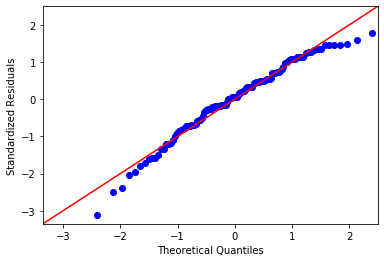

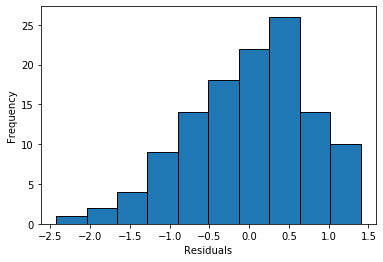

In [13]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()



In [14]:
# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)



0.972407877445221 0.014344469644129276


In [15]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=d_melt, res_var='Value', xfac_var=['Anthropomorphism','Emoji_state'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.2366
1,Degrees of freedom (Df),7.0000
2,p value,0.9754
